# 1. Personal Loan Modeling in Banking
## 1.1. Introduction
AI and Big Data are rapidly forcing their way to the top of the priority list for digital transformation in Banking. This is hardly surprising, considering that the collective potential cost savings for banks from AI applications are estimated to reach $447 billion by 2023 (Business Insider).

One of the main ways Artificial Intelligence and Machine Learning has augmented the BFSI Industry is Customer Insight, and personalized campaigns tailor-made to individuals by leveraging the huge amount of available information in terms of both structured and unstructured data that form a customer's digital footprint.

The following image illustrates the various ways Big Data Analytics powered by AI brings value to Digital Banking.

<img src="images/bank3.png"/>

## Personalized Campaigns in Digital Banking

Analyzing personal and transaction data gives Banks the opportunity to understand customers’ needs today and anticipate future ones. Personalization then adds the ability to deliver those insights to customers in a contextual manner. The most obvious application of these techniques is to increase sales targeting and effectiveness according to a defined business strategy.

A low balance with upcoming bills might call for a personal overdraft offer, a high balance on a current account might suggest appetite for a fixed deposit, recurring visits to the mortgage loan information page might indicate plans to purchase a home, a frequent traveller may be interested in a travel insurance, a fine dining lover might appreciate discounts at a popular restaurant, etc. The opportunities to leverage customer-centric data analytics and personalization for targeted cross-selling or merchants-based campaigns are numerous.

In this project, we attempt to predict whether a personal loan offer to a liability customer for a Bank is likely to result in success.

## 1.2 Context

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

## 1.3 Domain: Banking

## 1.4 Data Description
The file Bank_Personal_Loan_Modelling.csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## 1.5 Attribute Information
 - ID         : Customer ID
 - Age        : Customer's age in completed years
 - Experience : No. of years of professional experience
 - Income     : Annual income of the customer ($ 000)
 
 - ZIP Code   : Home Address Zip Code
 - Family     : Family size of the customer
 - CCAvg      : Avg. Spending on Credit Card per Month ($ 000)
 
 - Education  : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced / Professional
 - Mortgage   : Value of house mortgage if any. ($000)
 - Personal Loan : Did this customer accept the personal loan offered in the last campaign?
 - Securities Account : Does the customer have a securities account with the bank?
 - CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
 - Online : Does the customer use internet banking facilities?
 - Credit card : Does the customer use a credit card issued by this Bank?
 
## 1.6 Objectives

 - Exploratory Data Analysis
 - Preparing the data to train a model
 - Training and making predictions using a classification model
 - Model evaluation

# 2. Exploratory Data Analysis
## 2.1 Loading the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings("ignore")

In [2]:
# Read the Data
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


In [3]:
# let's explore the shape of the data. 
data.shape

(5000, 14)

In [4]:
# Let's Check if the data contains any missing or NaN values.
data.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


 - We see that a lot of categorical columns are being treated as integer datatypes. We'd like to convert them to categorical for our analysis.
 - First, we'd like to drop 2 columns that we think are not relevant to the prediction: 'ID' and 'ZIP Code'.

In [6]:
data.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)
data.head(3)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0


## 2.2 Data Preparation

In [7]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
# Dividing the columns in the dataset in to numeric and categorical attributes.
cols = set(data.columns)
cols_numeric = set(['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'])
cols_categorical = list(cols - cols_numeric)
cols_categorical

['Online',
 'Securities Account',
 'Education',
 'CreditCard',
 'Personal Loan',
 'CD Account',
 'Family']

In [9]:
for x in cols_categorical:
    data[x] = data[x].astype('category')

data.dtypes 

Age                      int64
Experience               int64
Income                   int64
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0


## 2.3 Data Visualization
### 2.3.1 Univariate Analysis - Numerical Attributes

In [11]:
# Let's construct a function that shows the summary and density distribution of a numerical attribute:
def summary(x):
    x_min = data[x].min()
    x_max = data[x].max()
    Q1 = data[x].quantile(0.25)
    Q2 = data[x].quantile(0.50)
    Q3 = data[x].quantile(0.75)
    print(f'5 Point Summary of {x.capitalize()} Attribute:\n'
          f'{x.capitalize()}(min) : {x_min}\n'
          f'Q1                    : {Q1}\n'
          f'Q2(Median)            : {Q2}\n'
          f'Q3                    : {Q3}\n'
          f'{x.capitalize()}(max) : {x_max}')

    fig = plt.figure(figsize=(16, 10))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('pastel')
    
    plt.subplot(221)
    ax1 = sns.distplot(data[x], color = 'r')
    plt.title(f'{x.capitalize()} Density Distribution')
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = data[x], palette = 'Accent', split = True)
    plt.title(f'{x.capitalize()} Violinplot')
    
    plt.subplot(223)
    ax2 = sns.boxplot(x=data[x], palette = 'cool', width=0.7, linewidth=0.6)
    plt.title(f'{x.capitalize()} Boxplot')
    
    plt.subplot(224)
    ax3 = sns.kdeplot(data[x], cumulative=True)
    plt.title(f'{x.capitalize()} Cumulative Density Distribution')
    
    plt.show()

5 Point Summary of Age Attribute:
Age(min) : 23
Q1                    : 35.0
Q2(Median)            : 45.0
Q3                    : 55.0
Age(max) : 67


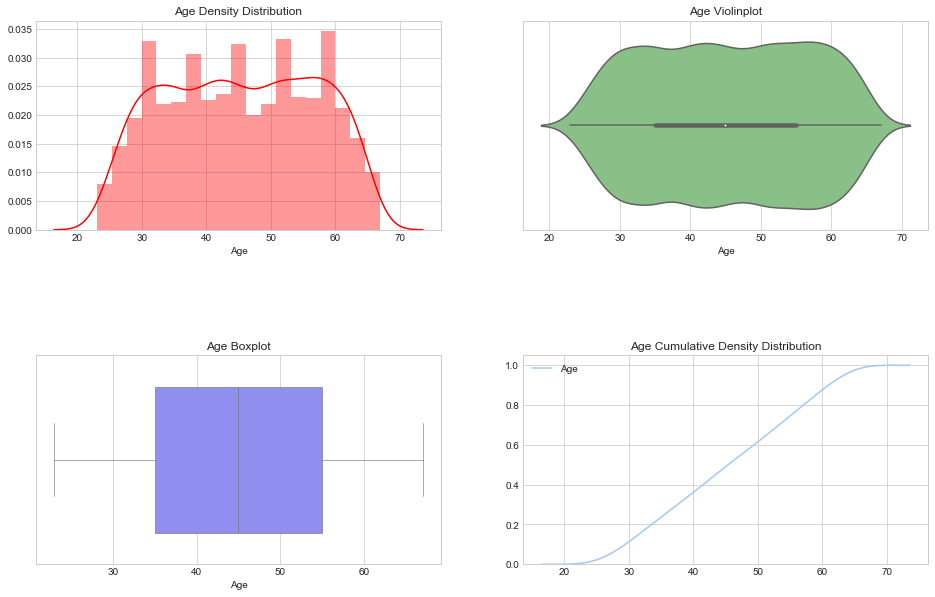

In [12]:
summary('Age')

### Observation:
 - We see that the age of the customers are uniformly distributed between the Min age of 23 and Max age of 67.

5 Point Summary of Experience Attribute:
Experience(min) : -3
Q1                    : 10.0
Q2(Median)            : 20.0
Q3                    : 30.0
Experience(max) : 43


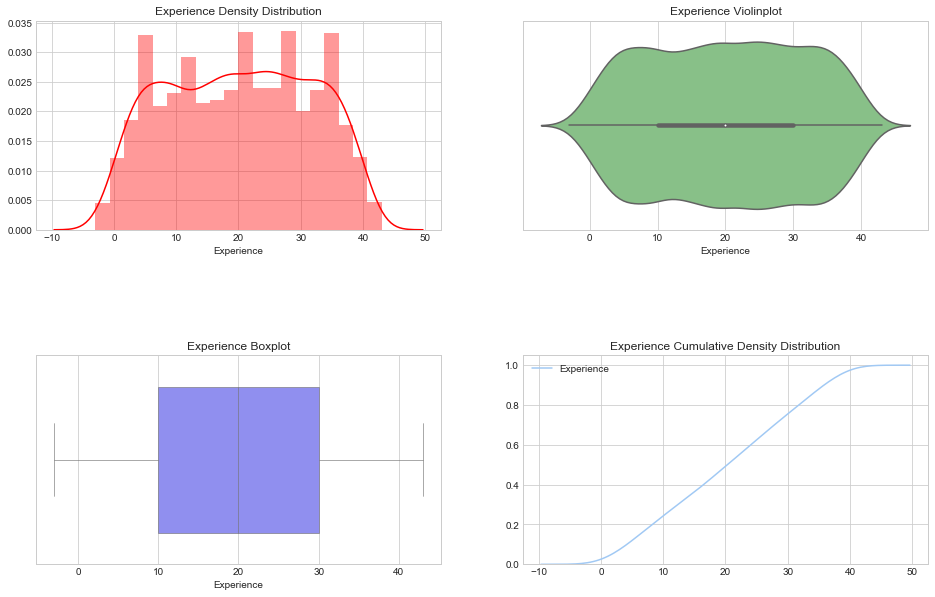

In [13]:
summary('Experience')

### Observation:
 - We see that the work experience of the customers are uniformly distributed between the Minimum of -3 and Maximum of 43.

5 Point Summary of Income Attribute:
Income(min) : 8
Q1                    : 39.0
Q2(Median)            : 64.0
Q3                    : 98.0
Income(max) : 224


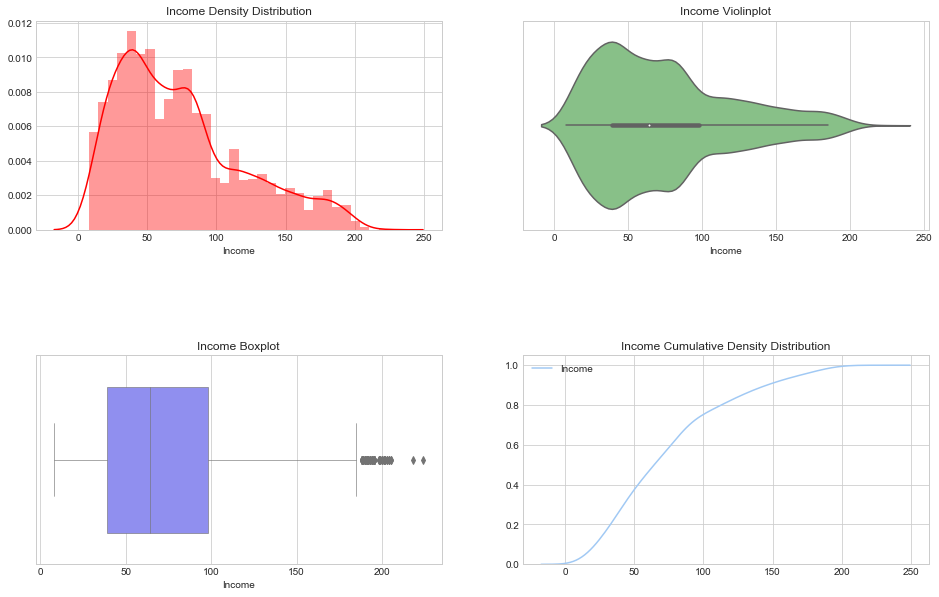

In [14]:
summary('Income')

### Observation:
 - We see that the income of the customers are skewed to the left with a median income of $64,000.
 - The Income attribute also has a lot of outlier values.

5 Point Summary of Ccavg Attribute:
Ccavg(min) : 0.0
Q1                    : 0.7
Q2(Median)            : 1.5
Q3                    : 2.5
Ccavg(max) : 10.0


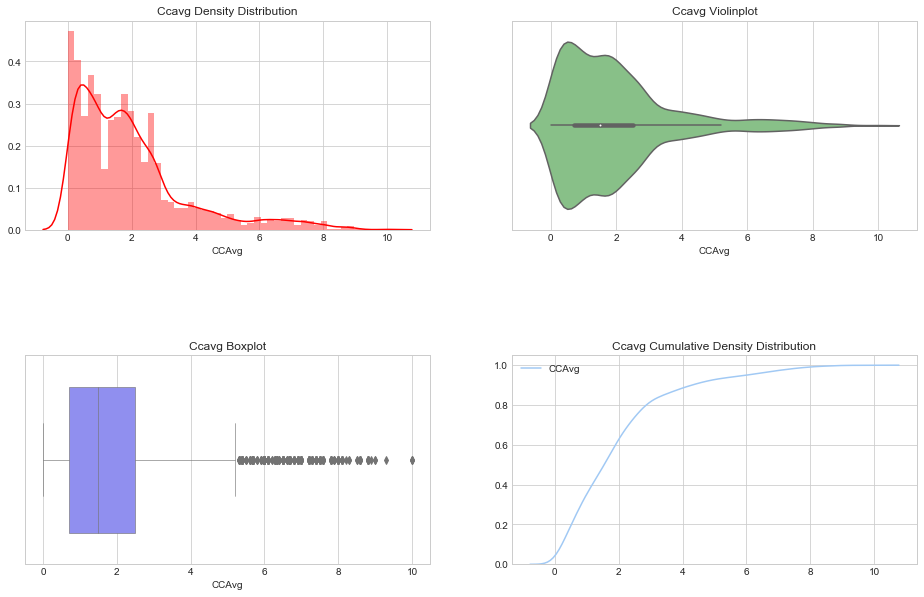

In [15]:
summary('CCAvg')

### Observation:
 - We see that the Average Monthly Credit Card spending of the customers are skewed heavily to the left, with a lot of outlier values.

5 Point Summary of Mortgage Attribute:
Mortgage(min) : 0
Q1                    : 0.0
Q2(Median)            : 0.0
Q3                    : 101.0
Mortgage(max) : 635


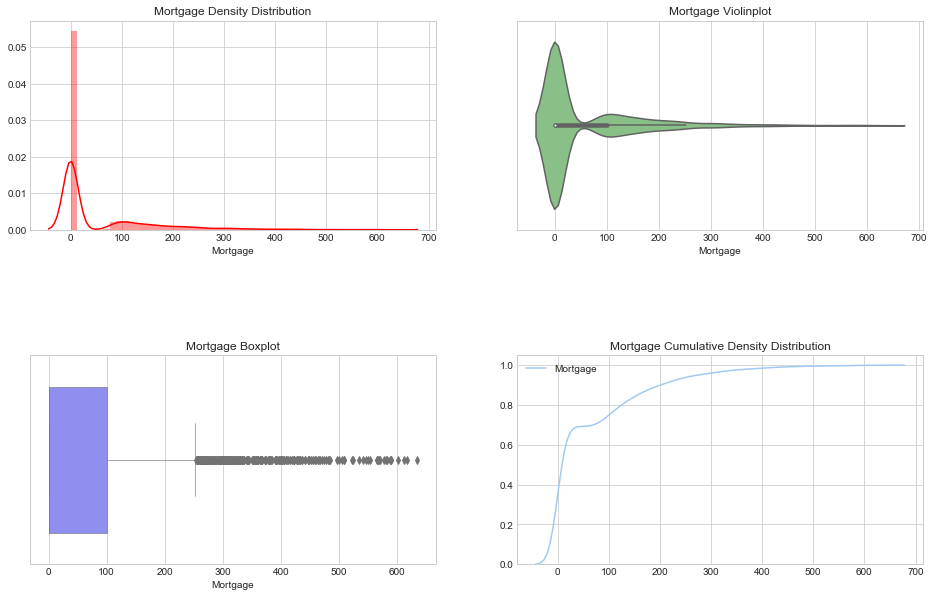

In [16]:
summary('Mortgage')

### Observation:
 - We see that the Mortgage amount of the customers are skewed heavily to the left, with a lot of outlier values.
 - The nature of distribution of numerical columns suggest that we may need to normalize the data before training our models.

### 2.3.2 Univariate Analysis - Categorical Attributes

In [17]:
# Create a function that returns a Pie chart and a Bar Graph for the categorical variables:
def cat_view(x = 'Education'):
    """
    Function to create a Bar chart and a Pie chart for categorical variables.
    """
    from matplotlib import cm
    color1 = cm.inferno(np.linspace(.4, .8, 30))
    color2 = cm.viridis(np.linspace(.4, .8, 30))
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    
     
    """
    Draw a Pie Chart on first subplot.
    """    
    s = data.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax[0].pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax[0].legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax[0].set_title(f'{x.capitalize()} Piechart')
    
    """
    Draw a Bar Graph on second subplot.
    """
    
    df = pd.pivot_table(data, index = [x], columns = ['Personal Loan'], values = ['Income'], aggfunc = len)

    labels = df.index.tolist()
    loan_no = df.values[:, 0].tolist()
    loan_yes = df.values[:, 1].tolist()
    
    l = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    rects1 = ax[1].bar(l - width/2, loan_no, width, label='No Loan', color = color1)
    rects2 = ax[1].bar(l + width/2, loan_yes, width, label='Loan', color = color2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[1].set_ylabel('Scores')
    ax[1].set_title(f'{x.capitalize()} Bar Graph')
    ax[1].set_xticks(l)
    ax[1].set_xticklabels(labels)
    ax[1].legend()
    
    def autolabel(rects):
        
        """Attach a text label above each bar in *rects*, displaying its height."""
        
        for rect in rects:
            height = rect.get_height()
            ax[1].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        fontsize = 'large',   
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

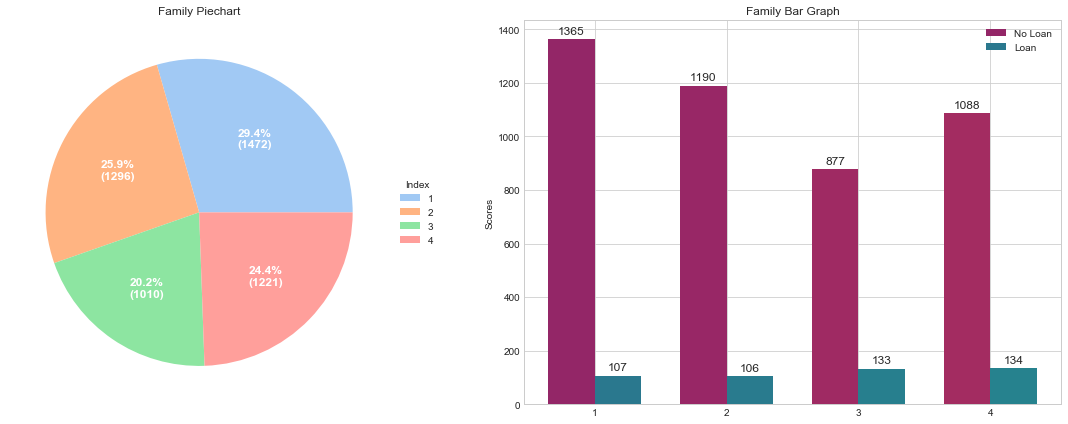

In [18]:
cat_view('Family')

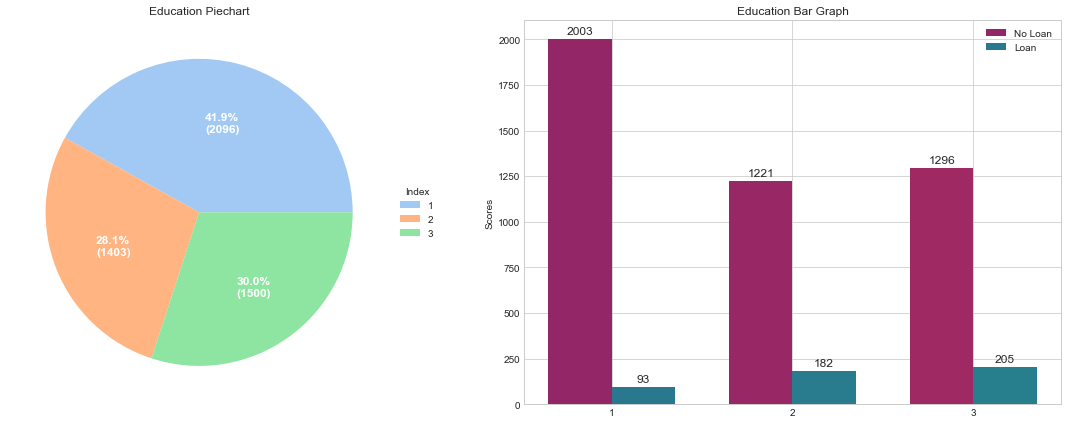

In [19]:
cat_view('Education')

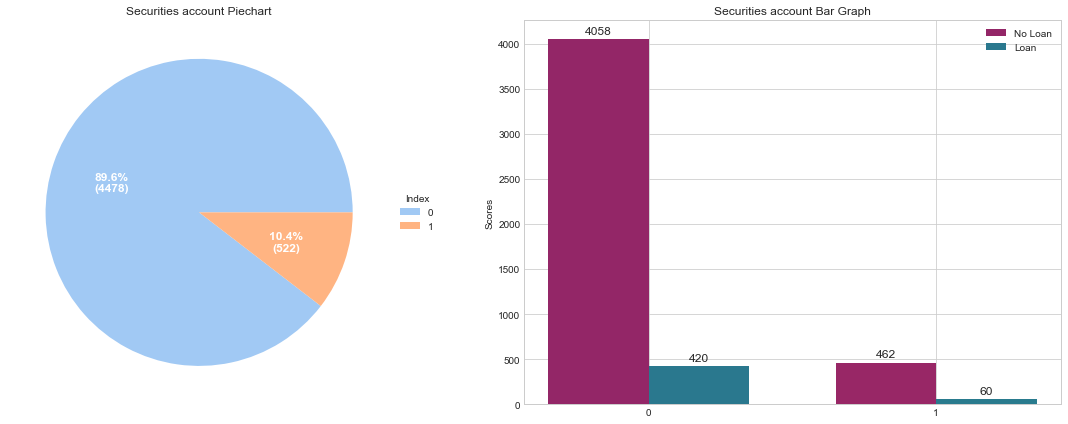

In [20]:
cat_view('Securities Account')

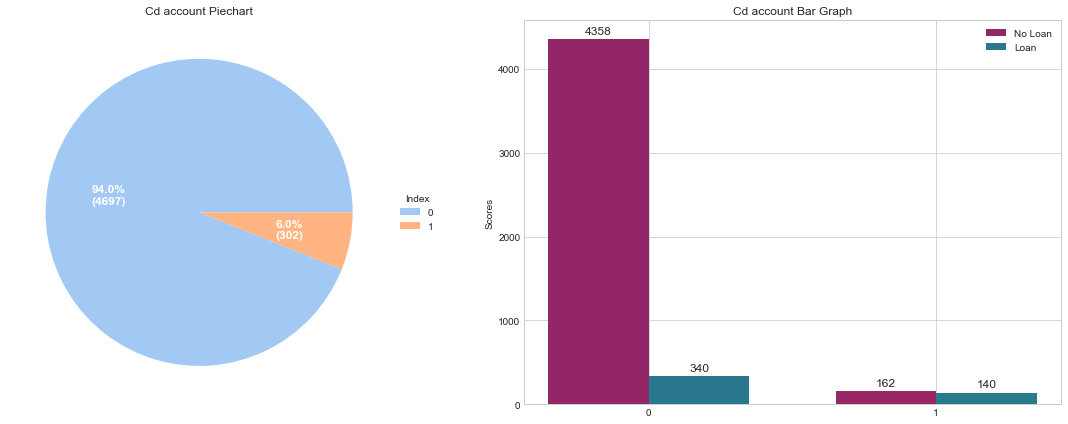

In [21]:
cat_view('CD Account')

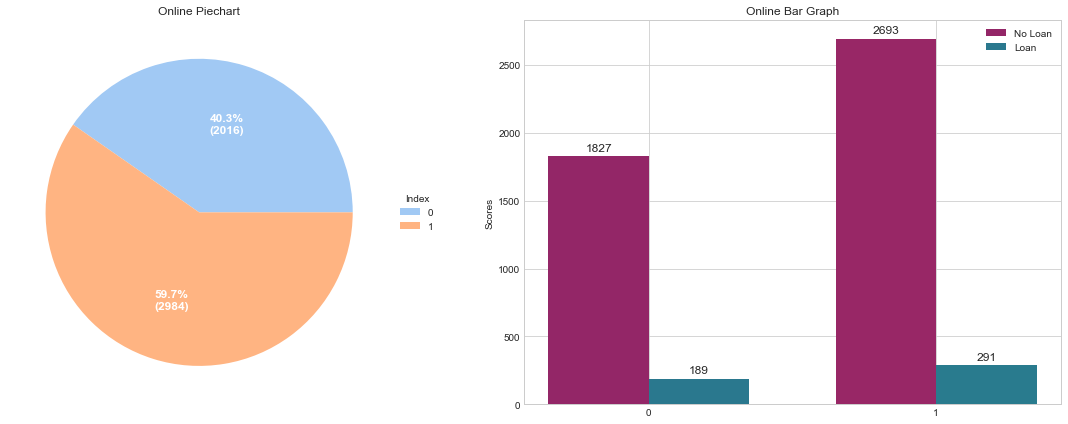

In [22]:
cat_view('Online')

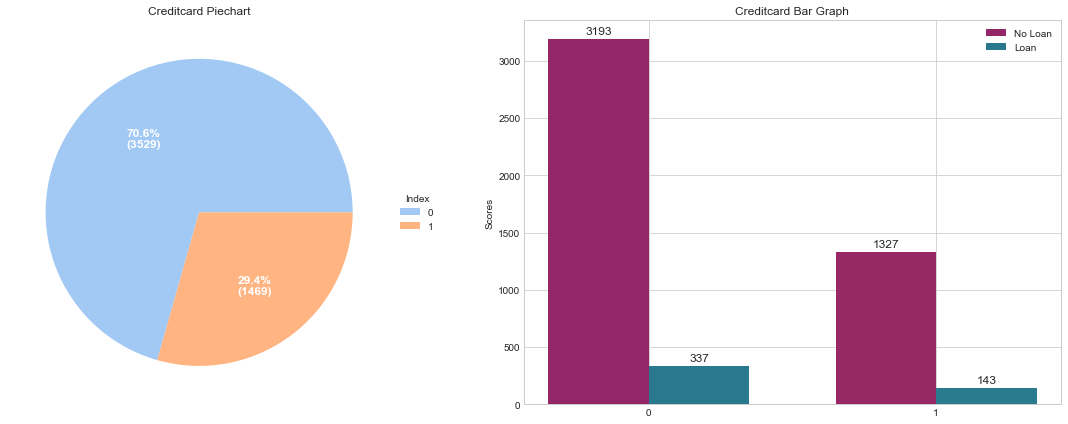

In [23]:
cat_view('CreditCard')

### Observation:
 - The distribution of 'CD Account' and 'Securities Account' are heavily imbalanced. 

### Target Variable Distribution

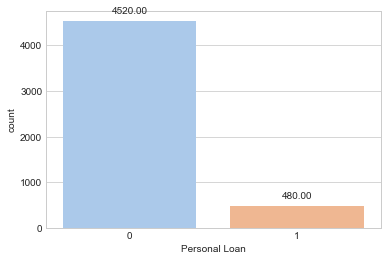

In [24]:
splot = sns.countplot(x = 'Personal Loan', data = data)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


### 2.3.3 Multivariate Analysis

In [25]:
X = data.drop('Personal Loan', axis = 1)
Y = data[['Personal Loan']]

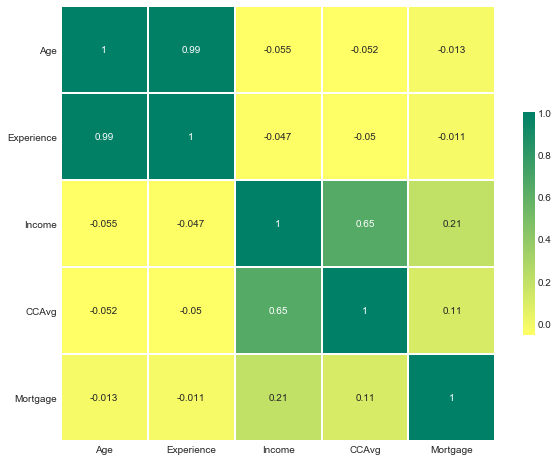

In [26]:
corr = X.corr()
plt.figure(figsize=(10, 8))
g = sns.heatmap(corr, annot=True, cmap = 'summer_r', square=True, linewidth=1, cbar_kws={'fraction' : 0.02})
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Observation:
 - We see there is a very strong positive correlation between Age and Work Experience, which is expected.
 - There is also a positive correlation between Income and Credit Card spending.

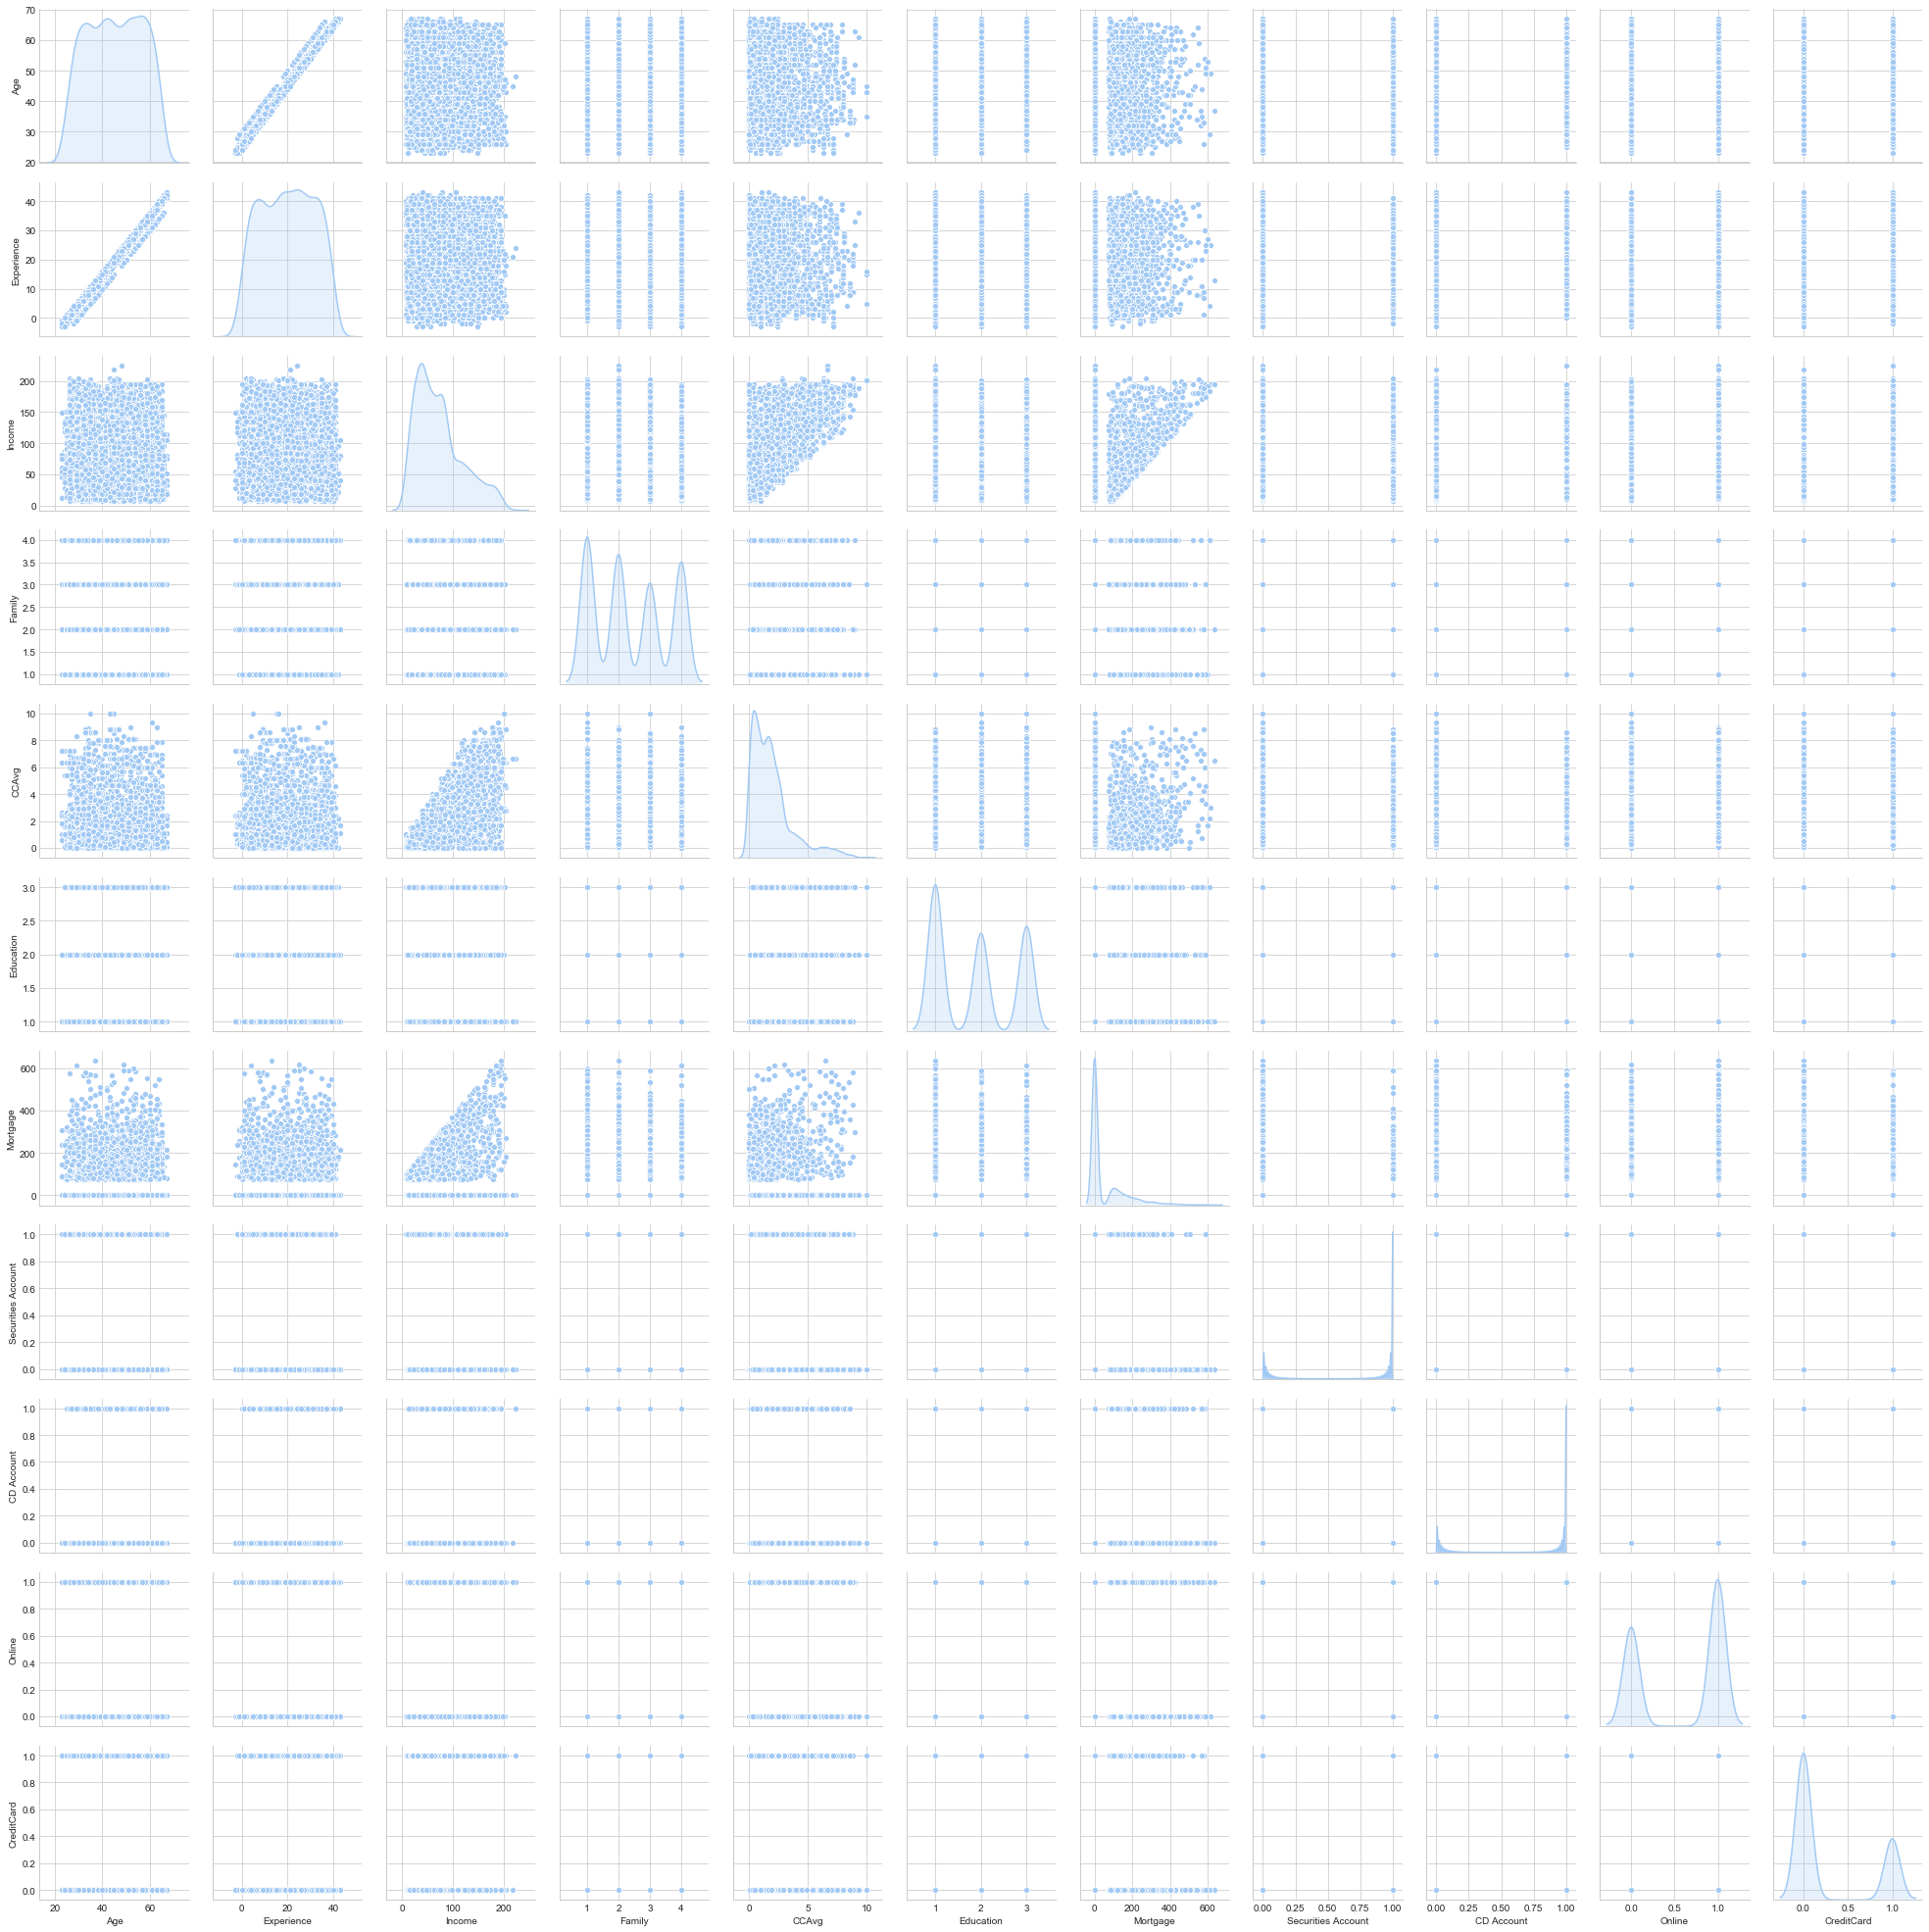

In [27]:
# Let's plot all Dependent variables to see their inter-relations.
sns.pairplot(X, diag_kind = 'kde')

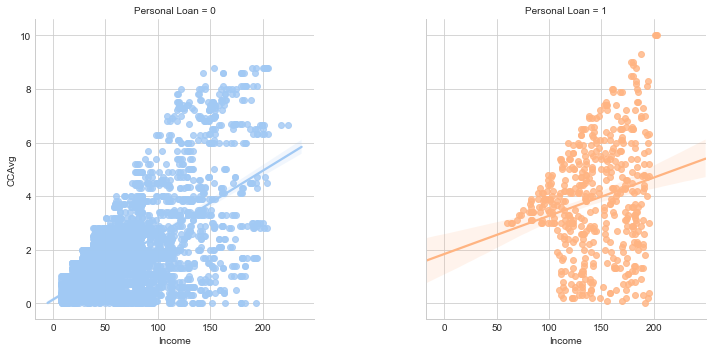

In [28]:
g = sns.lmplot(x = 'Income', y = 'CCAvg', col = 'Personal Loan', hue = 'Personal Loan', data = data, col_wrap=2, height=5)
g = g.fig.subplots_adjust(wspace=.4)

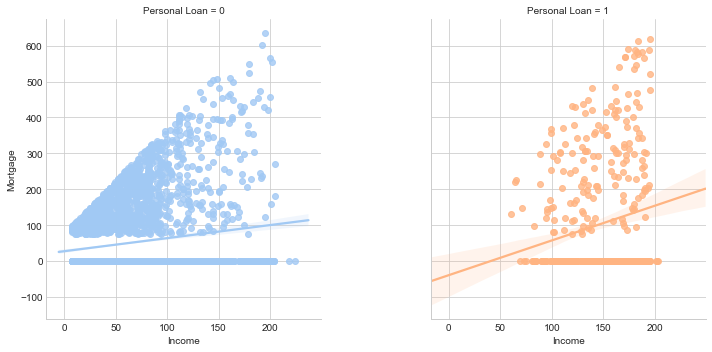

In [29]:
g = sns.lmplot(x = 'Income', y = 'Mortgage', col = 'Personal Loan', hue = 'Personal Loan', data = data, col_wrap=2, height=5)
g = g.fig.subplots_adjust(wspace=.4)

### Observations:
 - There are interesting relationships between Income and Average Monthly Credit Card Bill, and Income and Mortgage. This needs further investigation.

# 3. Data Pre-processing
## 3.1. Creating Dummy Variables
We start by creating dummy variables for all the categorical variables in the data.

In [30]:
XNew = pd.get_dummies(X, drop_first = True)
XNew.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,1.6,0,0,0,1,0,0,1,0,0,0
1,45,19,34,1.5,0,0,1,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,1,0,0,0,0,0
4,35,8,45,1.0,0,0,0,1,1,0,0,0,0,1


## 3.2. Feature Scaling
Due to the imbalance in the predictor variables, we would like to employ z-transform the data.

In [31]:
from scipy.stats import zscore
XScaled  = XNew.apply(zscore)  # convert all attributes to Z scale 

XScaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,2.478018e-17,1.0001,-1.948906,-0.901970,-0.029524,0.842923,1.889859
Experience,5000.0,-1.693312e-16,1.0001,-2.014911,-0.881204,-0.009122,0.862960,1.996667
Income,5000.0,1.939449e-16,1.0001,-1.428969,-0.755483,-0.212348,0.526315,3.263712
CCAvg,5000.0,-2.078338e-17,1.0001,-1.108987,-0.708412,-0.250611,0.321641,4.613525
Mortgage,5000.0,2.810197e-16,1.0001,-0.555524,-0.555524,-0.555524,0.437558,5.688108
Family_2,5000.0,3.852474e-16,1.0001,-0.591517,-0.591517,-0.591517,1.690569,1.690569
Family_3,5000.0,-7.339018e-16,1.0001,-0.503123,-0.503123,-0.503123,-0.503123,1.987585
Family_4,5000.0,-1.016964e-17,1.0001,-0.568728,-0.568728,-0.568728,-0.568728,1.758310
Education_2,5000.0,-2.122302e-16,1.0001,-0.624538,-0.624538,-0.624538,1.601185,1.601185
Education_3,5000.0,-3.148592e-17,1.0001,-0.654965,-0.654965,-0.654965,1.526798,1.526798


## 3.3. Train - Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.30, random_state=1, stratify = Y)

# 4. Training Models
## 4.1. Logistic Regression

In [33]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_pred = model.predict(X_test)

In [34]:
model_score = model.score(X_test, y_test)
print(model_score)

0.956


In [35]:
# Our model boasts an accuracy score of 0.956, but this may not be the best indicator for our model performance. Let's investigate how well our model is in terms of mis-classifications.

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.956
Precision: 0.8611111111111112
Recall: 0.6458333333333334


   Predict 1  Predict 0
1         93         51
0         15       1341


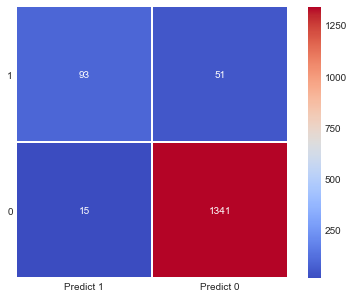

In [36]:
# Let's draw the confusion matrix for test performance.

cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)

plt.figure(figsize = (7,5))
g = sns.heatmap(df_cm, annot=True, cmap = 'coolwarm', fmt='g', square=True, linewidth=1)
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### ROC Curve
An ROC curve (or receiver operating characteristic curve) is a plot that summarizes the performance of a binary classification model on the positive class.

The x-axis indicates the False Positive Rate and the y-axis indicates the True Positive Rate.

#### ROC Curve: Plot of False Positive Rate (x) vs. True Positive Rate (y).

The true positive rate is a fraction calculated as the total number of true positive predictions divided by the sum of the true positives and the false negatives (e.g. all examples in the positive class). The true positive rate is referred to as the sensitivity or the recall.

<code>TruePositiveRate = TruePositives / (TruePositives + False Negatives)</code>

The false positive rate is calculated as the total number of false positive predictions divided by the sum of the false positives and true negatives (e.g. all examples in the negative class).

<code>FalsePositiveRate = FalsePositives / (FalsePositives + TrueNegatives)</code>

We can think of the plot as the fraction of correct predictions for the positive class (y-axis) versus the fraction of errors for the negative class (x-axis).

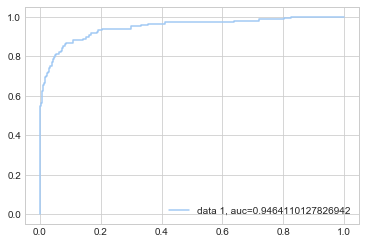

In [37]:
# Let's draw the ROC curve to understand the performance of our classifier.
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [38]:
print("Classification Report")
print(metrics.classification_report(y_test, y_pred, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.86      0.65      0.74       144
           0       0.96      0.99      0.98      1356

    accuracy                           0.96      1500
   macro avg       0.91      0.82      0.86      1500
weighted avg       0.95      0.96      0.95      1500



### Precision-Recall Curves and AUC

Precision is a metric that quantifies the number of correct positive predictions made.

It is calculated as the number of true positives divided by the total number of true positives and false positives.

<code>Precision = TruePositives / (TruePositives + FalsePositives)</code>

The result is a value between 0.0 for no precision and 1.0 for full or perfect precision.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

It is calculated as the number of true positives divided by the total number of true positives and false negatives (e.g. it is the true positive rate).

<code>Recall = TruePositives / (TruePositives + FalseNegatives)</code>

The result is a value between 0.0 for no recall and 1.0 for full or perfect recall.

Both the precision and the recall are focused on the positive class (the minority class) and are unconcerned with the true negatives (majority class).

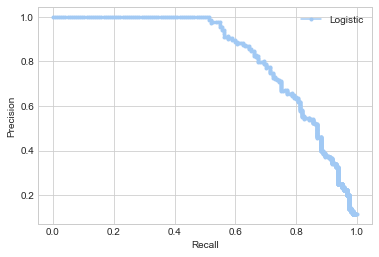

In [39]:
y_pred_proba = model.predict_proba(X_test)[::,1]
y_pred = model.predict(X_test)

lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

## Observation:
 - With an f1 score of 0.74, our Log Regression Model has performed decently for the given dataset.

## 4.2. Gaussian Naive Bayes

In [40]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
y_train_predict = gnb_model.predict(X_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, y_train_predict)))

Model Accuracy: 0.8854


In [42]:
y_test_predict = gnb_model.predict(X_test)

print("Test Accuracy:",metrics.accuracy_score(y_test, y_test_predict))
print("Test Precision:",metrics.precision_score(y_test, y_test_predict))
print("Test Recall:",metrics.recall_score(y_test, y_test_predict))

Test Accuracy: 0.8973333333333333
Test Precision: 0.4734042553191489
Test Recall: 0.6180555555555556


   Predict 1  Predict 0
1         89         55
0         99       1257


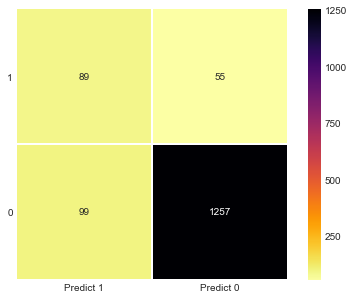

In [43]:
cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)

plt.figure(figsize = (7,5))
g = sns.heatmap(df_cm, annot=True, cmap = 'inferno_r', fmt='g', square=True, linewidth=1)
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [44]:
print("Classification Report")
print(metrics.classification_report(y_test, y_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.47      0.62      0.54       144
           0       0.96      0.93      0.94      1356

    accuracy                           0.90      1500
   macro avg       0.72      0.77      0.74      1500
weighted avg       0.91      0.90      0.90      1500



## Observation:
 - With an f1 score of 0.54, our GNB model has performed worse than LR.
 - The Gaussian Naive Bayes model has 2 main assumptions: a. The predictor variables are linearly independent, and b. all features have same effect on the dependent variable. both of these assumptions are violated in our dataset.
 - The Gaussian NB model doesn't work well when there are too many categorical variables in the predictors, as is the case here.

## 4.3. k Nearest Neighbor

In [45]:
NNH = KNeighborsClassifier(n_neighbors= 7, weights = 'distance' )
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='distance')

In [46]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9506666666666667

In [47]:
y_test_predict = NNH.predict(X_test)

print("Test Accuracy:",metrics.accuracy_score(y_test, y_test_predict))
print("Test Precision:",metrics.precision_score(y_test, y_test_predict))
print("Test Recall:",metrics.recall_score(y_test, y_test_predict))

Test Accuracy: 0.9506666666666667
Test Precision: 0.9487179487179487
Test Recall: 0.5138888888888888


   Predict 1  Predict 0
1         74         70
0          4       1352


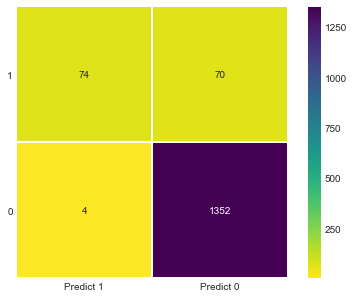

In [48]:
cm=metrics.confusion_matrix(y_test, y_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)

plt.figure(figsize = (7,5))
g = sns.heatmap(df_cm, annot=True, cmap = 'viridis_r', fmt='g', square=True, linewidth=1)
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [49]:
print("Classification Report")
print(metrics.classification_report(y_test, y_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.95      0.51      0.67       144
           0       0.95      1.00      0.97      1356

    accuracy                           0.95      1500
   macro avg       0.95      0.76      0.82      1500
weighted avg       0.95      0.95      0.94      1500



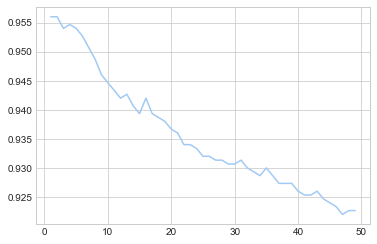

In [50]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))
    
plt.plot(range(1,50),scores)

In [51]:
# let's try to find the optimal parameters for kNN model through grid search.
from sklearn.model_selection import GridSearchCV

#making the instance
model = KNeighborsClassifier(n_jobs=-1)
#Hyper Parameters Set
params = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model1 = GridSearchCV(model, param_grid=params, n_jobs=1)
#Learning
model1.fit(X_train, y_train)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test)
#importing the metrics module

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction, y_test))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(y_test, prediction))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.954
Confusion Metrix:
 [[1353    3]
 [  66   78]]


In [52]:
print("Test Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Test Precision:",metrics.precision_score(y_test, prediction))
print("Test Recall:",metrics.recall_score(y_test, prediction))

Test Accuracy: 0.954
Test Precision: 0.9629629629629629
Test Recall: 0.5416666666666666


   Predict 1  Predict 0
1         78         66
0          3       1353


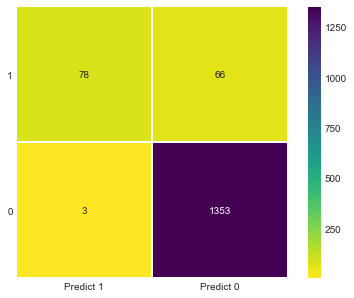

In [53]:
cm=metrics.confusion_matrix(y_test, prediction, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print(df_cm)

plt.figure(figsize = (7,5))
g = sns.heatmap(df_cm, annot=True, cmap = 'viridis_r', fmt='g', square=True, linewidth=1)
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [54]:
# Let's print the new classification report based on the optimized parameters.
print("Classification Report")
print(metrics.classification_report(y_test, prediction, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.96      0.54      0.69       144
           0       0.95      1.00      0.98      1356

    accuracy                           0.95      1500
   macro avg       0.96      0.77      0.83      1500
weighted avg       0.95      0.95      0.95      1500



## Conclusion:

 - Based on the 3 models we have tested, the Logistic Regression model performs best for our dataset.